In [145]:
import numpy as np
import pandas as pd
import cv2
import os
import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt
import keras

In [146]:
X_train = []
y_train = []
data_path = "C:/Users/Smit/janaagraha_dataset/images/"
classes = []

In [147]:
category = pd.read_csv('cd_bangalore_complaints.csv')
imageid = pd.read_csv('cd_img_id_map.csv')

In [148]:
ls = pd.merge(category,imageid,on='generic_id')

In [149]:
# ls = ls.drop(columns=['generic_id'])
ls.drop(ls.columns[[0,1,2,3,4,5,7,8,9,10,11]], axis=1, inplace=True)
ls['image_path'] = ls['image_path'].str.replace('images/','')
ls['image_path'] = ls['image_path'].str.replace('images/','')
ls = ls.dropna()
ls['category_id'] = ls['category_id'].astype(int)

In [150]:
i=0
for image in os.listdir(data_path):
#     print(ls[ls['image_path']==image]['category_id'])
    img = cv2.imread(data_path+"/"+image)
    img = cv2.resize(img,(480,640))
    X_train.append(img)
    classes.append(ls[ls['image_path']==image]['category_id'])
    i=i+1
    if i==500:
        break

In [151]:
xTrain = X_train
X_train = []
y_train = []
N = len(classes)
for i in  range(490):
    if classes[i].empty:
        print("yes")
        continue
    X_train.append(xTrain[i])
    y_train.append(classes[i])

yes


In [152]:
for i in range(len(y_train)):
    y_train[i]=int(y_train[i])

In [153]:
df = pd.read_csv('cd_categories.csv')

In [154]:
df

,id,title,parent_id
0,1,Certificates,0
1,2,Crime and Safety,0
2,4,Electricity and Power Supply,0
3,5,Fire Safety,0
4,6,Garbage and Unsanitary Practices,0
...,...,...,...
188,421,Construction Of Sewage Treatment Plant,472
189,87,Prevent Unauthorized Tree Cutting,473
190,180,Defacement Of Trees,473
191,355,Maintenance Of Trees/Saplings,473


In [155]:
y=y_train

In [156]:
y_train=y

In [157]:
ytrain = []
classes = []
uniq = np.unique(y_train)
classes=[]
for x in uniq:
    classes.append(df[df['id']==int(x)]['title'].values)
for x in y_train:
    ytrain.append(df[df['id']==int(x)]['title'].values)
y_train=[]
for x in ytrain:
    y_train.append(classes.index(x))

In [131]:
len(y_train)

489

In [132]:
import numpy as np
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)

In [133]:
y_train = np.expand_dims(y_train, axis=1)
print(X_train.shape)
print(y_train.shape)

(489, 640, 480, 3)
(489, 1)


In [134]:
X_train = X_train/255

In [98]:
X_train = X_train[:-1]

In [135]:
from keras.utils import np_utils
#one hot encoder
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)

In [136]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [137]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',
                input_shape=(640,480,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 640, 480, 16)      208       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 320, 240, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 320, 240, 32)      2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 160, 120, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 160, 120, 64)      8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 80, 60, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 80, 60, 128)      

In [138]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [139]:
from keras.callbacks import ModelCheckpoint   

# train the model
# checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,save_best_only=True)

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=5, callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/5
 - 142s - loss: 4.5373 - accuracy: 0.2577
Epoch 2/5


C:\Users\Smit\Anaconda2\envs\py36-test\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 158s - loss: 1.9469 - accuracy: 0.4029
Epoch 3/5
 - 155s - loss: 1.9685 - accuracy: 0.3722
Epoch 4/5
 - 164s - loss: 1.8419 - accuracy: 0.4213
Epoch 5/5
 - 181s - loss: 1.8374 - accuracy: 0.3885


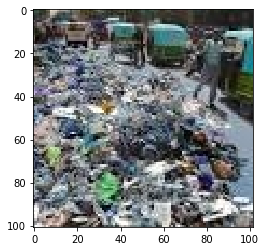

In [160]:
test=[]
img = cv2.imread("C:\\Users\\Smit\\janaagraha_dataset\\images\\original_100203.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(480,640))
test.append(img)
test = np.asarray(test, dtype=np.float32)
test = test/255

In [164]:
classimg = model.predict_classes(test)
print(classes[classimg[0]])

['Garbage and Unsanitary Practices']


array([1], dtype=int64)